# Data Processing

* If recorded on iPhone, split the audio from each microphone into its own sample
* Break down the data into n second chunks. 
* Assess audio data before the ramping up and ramping down of the angle grinder 
* Convert the sound data into the frequency domain
* Create frequency bins 
* Append 0 or 1 depending on angle grinder or not 

## Research

Chainsaw detector in Amazon: https://www.semanticscholar.org/paper/A-Method-for-Chainsaw-Sound-Detection-Based-on-Nicolae-Gaita/b26f46a5bef8d269fc1fadbbbc319c3ba71adcdd
    - multiple classification algorithms used: (J48, SVM, JRip, Random Forest (best))
        * chose model based on highest true positive rate and lowest false alarm rate 
    - used other environmental sounds such as birds, tractors, gunshots, human voice
    
Chainsaw detector in Amazon Framework: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7551565:
    - data:
        * had 12 different chainsaws as the 'positive class'
        * audio records recorded at 44.1 kHz
        * separated into 1 sec framds without overlap 
        * had 560 instances for chainsaw class 
        * audio records represented as Mel-Frequency Cepstral Coefficients (MFCCs) 
        * everything other than chainsaws were lumped into the 'natural environment' class
    - MFCC in Python: https://www.youtube.com/watch?v=WJI-17MNpdE
        * very easily done using 'librosa' library in python
        * The tutorial does not do a FFT before extracting MFCC's but the paper that this is subbed under does 

TESPAR (invented for analyzing waveforms in speech recognition): https://ieeexplore.ieee.org/document/6084943
    - categorizes waveforms into (generally at most) 28 symbols 

## Split Audio Into Chunks

In [185]:
import scipy.io.wavfile as wav
import numpy as np
import pandas as pd
import os
import math
from IPython.display import Audio
from matplotlib import pyplot as plt


In [167]:
# all raw data, values are np.arrays
raw_data = []

# the 'trimmed' data were manually truncated to the valueable information
for root, dirs, files in os.walk("C:/Users/adamf/OneDrive/Documents/university/UBC/homework_Winter_2021/IGEN_330/BikeSentry_data/angle-grinders/"):
    for file in files:
        # samplerate is constant from the same recording device. If not iPhone XR, do not do this!!!!!
        if("trimmed" in file):
            samplerate, y = wav.read(root + file)
            y0 = y[:, 0]
            y1 = y[:, 1]
            raw_data.append(y0)
            raw_data.append(y1)
     
    

In [168]:
len(raw_data)

16

AttributeError: 'AxesImage' object has no attribute 'set_xlabel'

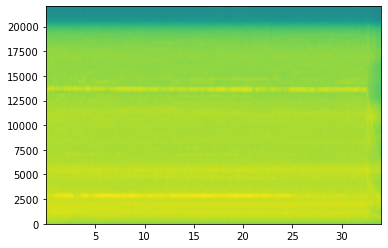

In [412]:
SamplingFreq=10000    # Sampling Frequency
WindowSize = 256      # the length of the windowing segments  1024   256
OverLap=200
Pxx, freqs, bins, im = plt.specgram(raw_data[10], NFFT=WindowSize, Fs=samplerate, noverlap=OverLap)


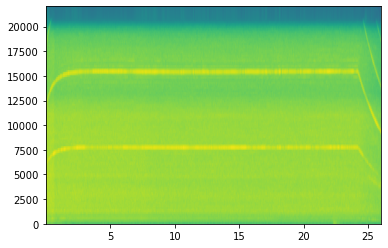

In [396]:
Pxx, freqs, bins, im = plt.specgram(raw_data[5], NFFT=WindowSize, Fs=samplerate, noverlap=OverLap)

In [169]:
for rec in raw_data:
    s = len(rec) / samplerate
    print(f"Recording time: {round(s, 2)} seconds")

Recording time: 32.45 seconds
Recording time: 32.45 seconds
Recording time: 30.05 seconds
Recording time: 30.05 seconds
Recording time: 26.2 seconds
Recording time: 26.2 seconds
Recording time: 30.05 seconds
Recording time: 30.05 seconds
Recording time: 50.1 seconds
Recording time: 50.1 seconds
Recording time: 34.3 seconds
Recording time: 34.3 seconds
Recording time: 31.1 seconds
Recording time: 31.1 seconds
Recording time: 32.45 seconds
Recording time: 32.45 seconds


In [170]:
# cutting data from the front of the recording to make records to be ~even~ seconds
for index, rec in enumerate(raw_data):
    s = len(rec) / samplerate
    floor_s = math.floor(s)
    time_cutoff = s - floor_s
    samples_cutoff = int(time_cutoff * samplerate)
    raw_data[index] = rec[samples_cutoff:]
    
    print(len(raw_data[index]) / samplerate)
    

    
    

32.0
32.0
30.0
30.0
26.00002267573696
26.00002267573696
30.0
30.0
50.0
50.0
34.000022675736965
34.000022675736965
31.0
31.0
32.0
32.0


In [171]:
# making chunk size
# currently only neat if each chunk is 1 second 
seconds = 2
chunk_size = int(seconds * samplerate)
chunks_final = pd.DataFrame([np.zeros(chunk_size)])

# if seconds != 1, there will be some lost data. Hard to avoid this if we are going to have a lot of time recorded 
# removes time from the beginning of the recording because there is more often noise there than at the end
for rec in raw_data:
    n_chunks = math.floor(len(rec) / chunk_size)
    for i in range(len(rec) - (n_chunks * chunk_size), len(rec), chunk_size):
        chunk = rec[i:(i+chunk_size)]
        #print(f"Length: {len(chunk)}, First Value: {chunk[0]}, Last Value: {chunk[len(chunk) - 1]}")
        chunks_final = chunks_final.append(pd.Series(chunk), ignore_index = True)

# get rid of filler zero's line
chunks_final = chunks_final.iloc[1:, :]

Length: 88200, First Value: -0.13434329628944397, Last Value: -0.06225987523794174
Length: 88200, First Value: 0.12991589307785034, Last Value: -0.12175912410020828
Length: 88200, First Value: 1.313723623752594e-05, Last Value: 0.0838283896446228
Length: 88200, First Value: 0.003058796748518944, Last Value: 0.09422613680362701
Length: 88200, First Value: -0.07642726600170135, Last Value: -0.01078113541007042
Length: 88200, First Value: -0.023249780759215355, Last Value: -0.09655167162418365
Length: 88200, First Value: 0.019270513206720352, Last Value: -0.07360444217920303
Length: 88200, First Value: -0.05598878115415573, Last Value: -0.05575835332274437
Length: 88200, First Value: -0.08670078963041306, Last Value: -0.04846467822790146
Length: 88200, First Value: -0.09757813811302185, Last Value: 0.03222168982028961
Length: 88200, First Value: -0.001976810395717621, Last Value: 0.04559405893087387
Length: 88200, First Value: -0.03786938264966011, Last Value: 0.05455506592988968
Length: 

Length: 88200, First Value: -0.10280700027942657, Last Value: -0.014863922260701656
Length: 88200, First Value: 0.02482461929321289, Last Value: -0.10725777596235275
Length: 88200, First Value: -0.11883572489023209, Last Value: -0.010085024870932102
Length: 88200, First Value: 0.07281874865293503, Last Value: 0.022093279287219048
Length: 88200, First Value: 0.04329684376716614, Last Value: -0.11185786128044128
Length: 88200, First Value: -0.08007725328207016, Last Value: -0.022901296615600586
Length: 88200, First Value: -0.03106624446809292, Last Value: 0.03746938332915306
Length: 88200, First Value: -0.01970576122403145, Last Value: 0.01066653337329626
Length: 88200, First Value: -0.027640733867883682, Last Value: 0.02256985567510128
Length: 88200, First Value: 0.0853210836648941, Last Value: 0.11000359058380127
Length: 88200, First Value: -0.028454706072807312, Last Value: -0.048968568444252014
Length: 88200, First Value: -0.08507442474365234, Last Value: -0.042638976126909256
Length

Length: 88200, First Value: 0.0014132596552371979, Last Value: 0.07571298629045486
Length: 88200, First Value: 0.04295925050973892, Last Value: 0.04293368011713028
Length: 88200, First Value: -0.0041527412831783295, Last Value: -0.05272920802235603
Length: 88200, First Value: -0.02862418256700039, Last Value: 0.016395380720496178
Length: 88200, First Value: 0.013093400746583939, Last Value: -0.027147186920046806
Length: 88200, First Value: 0.039444856345653534, Last Value: -0.020558156073093414
Length: 88200, First Value: -0.01340518333017826, Last Value: 0.012758012861013412
Length: 88200, First Value: 0.006828255020081997, Last Value: -0.06209249794483185
Length: 88200, First Value: -0.07191105931997299, Last Value: -0.04830572009086609
Length: 88200, First Value: -0.04208967089653015, Last Value: -0.06205519288778305
Length: 88200, First Value: -0.03157435357570648, Last Value: 0.09570413827896118
Length: 88200, First Value: 0.06967999041080475, Last Value: -0.06654395908117294
Leng

In [173]:
chunks_final.shape

(264, 88200)

In [174]:
# sample if you want to play the audio snippets 
Audio(chunks_final.iloc[2,:].to_numpy(), rate = samplerate)

## Convert to Frequency Domain

In [405]:
def rawAudioToFreq(arr: np.array, bins: int):
    n = len(arr)                       # length of the signal
    k = np.arange(n)
    T = n/samplerate
    
    frq = k/T # two sides frequency range
    
    
    zz=int(n/2)
    freq = frq[range(zz)]           # one side frequency range
    Y0 = np.fft.fft(arr)/n              # fft computing and normalization
    Y = Y0[range(zz)]

    # obtaining maximum amplitude and its corresponding frequency 
    Y_max = abs(Y).max()
    freq_max = freq[np.where(abs(Y) == Y_max)[0][0]]
    
    arr = np.array([freq.astype(int), Y.astype(int)])
    bin_size = math.floor(arr[0, arr.shape[1]-1] / bins)
    bin_minimums = np.arange(0, arr[0, arr.shape[1] - 1], bin_size)
    bin_arr = np.array([bin_minimums, np.zeros(len(bin_minimums))])

    # collecting magintudes in bins 
    for i in range(0, arr[0, arr.shape[1] - 1], math.floor(bin_size)):
        bin_arr[1, int(i / bin_size)] = np.sum(abs(Y)[i:(i+bin_size)])
    
    plt.plot(freq, abs(Y))
    plt.xlim([freq_max - 100, freq_max + 100])
    return freq, abs(Y), bin_arr, Y_max, freq_max

<ipython-input-405-b198ff368971>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array([freq.astype(int), Y.astype(int)])


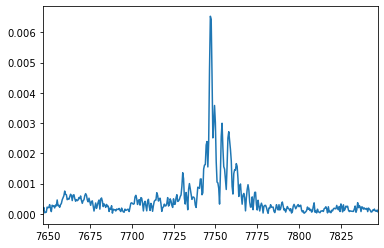

In [406]:
freq_test, Y_test, bin_array, Y_max, freq_max = rawAudioToFreq(chunks_final.to_numpy()[117, :], 100)

In [390]:

print(Y_max)
print(freq_max)
pd.DataFrame(bin_array).iloc[:,30:40]

0.006529051444207139
7747.0


,30,31,32,33,34,35,36,37,38,39
0,6600.000000,6820.000000,7040.000000,7260.000000,7480.000000,7700.000000,7920.000000,8140.00000,8360.000000,8580.000000
1,0.034678,0.037542,0.036499,0.037803,0.035927,0.034131,0.041785,0.05866,0.048008,0.041738


## Input 